# Pytorch 101 - 003
#### *Date* : 2019.04.07
#### *Auther* :`Jen-Huan Hu`

Let's talk about image preprocessing toolset provided in ```torchvision.transforms```:  

***Using ```transforms.Compose([ Op1, Op2, ... ])``` to compose a series of operations into a single function***


- ```torchvision.transforms.CenterCrop(size)``` :  
    Crops the given PIL Image at the center.
- ```torchvision.transforms.Grayscale(num_output_channels=1)``` :  
    Convert image to grayscale.
- ```torchvision.transforms.Pad(padding, fill=0, padding_mode='constant')``` :  
    Pad the given PIL Image on all sides with the given “pad” value.
- ```torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)``` :  
    Random affine transformation of the image keeping center invariant
- ```torchvision.transforms.RandomApply(transforms, p=0.5)``` :  
    Apply random transformation
- ```torchvision.transforms.RandomChoice(transforms)``` :  
    Apply single transformation randomly picked from a list
- ```torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')``` :  
    Crop the given PIL Image at a random location.
- ```torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)``` :  
    Crop the given PIL Image to random size and aspect ratio.
- ```torchvision.transforms.RandomRotation(degrees, resample=False, expand=False, center=None)``` :  
    Rotate the image by angle.
- ```torchvision.transforms.Resize(size, interpolation=2)``` :  
    Resize the input PIL Image to the given size.
- ```torchvision.transforms.RandomHorizontalFlip(p=0.5)``` :  
    Horizontally flip the given PIL Image randomly with a given probability.
- ```torchvision.transforms.RandomVerticalFlip(p=0.5)``` :  
    Vertically flip the given PIL Image randomly with a given probability.\
    
***The above operations are usually accompany with Type Conversions*** :
- ```torchvision.transforms.ToPILImage(mode=None)``` :  
    Convert a tensor or an ndarray to PIL Image.  
    Converts a torch.*Tensor of shape C x H x W or a numpy ndarray of shape H x W x C to a PIL Image while preserving the value range.
- ```torchvision.transforms.ToTensor``` :  
    Convert a PIL Image or numpy.ndarray to tensor.  
    Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
    
***And the well-known normalization*** :
- ```torchvision.transforms.Normalize(mean, std, inplace=False)``` :  
    Normalize a tensor image with mean and standard deviation. Given mean: (M1,...,Mn) and std: (S1,..,Sn) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e. input[channel] = (input[channel] - mean[channel]) / std[channel]

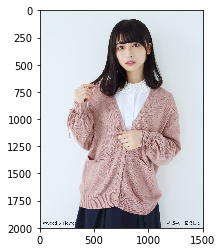

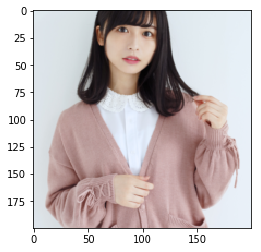

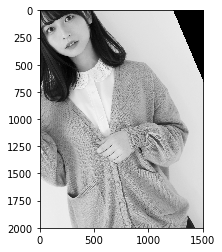

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as trans
import torch
import numpy as np
ReFn = trans.Compose( [ trans.Resize(256), trans.RandomHorizontalFlip(0.9), trans.RandomCrop(200) ] )
img1_pil = Image.open('Neru.jpg')
img1_np = np.array( img1_pil )
img1_tn = torch.tensor( img1_np )

plt.ion()

plt.figure()
plt.imshow(img1_pil)


AftResize = ReFn( img1_pil )
plt.figure()
plt.imshow(AftResize)

RnFn = trans.Compose( [ trans.RandomAffine(33, translate=[0.5, 0.1], scale=[0.5, 2.]), trans.Grayscale() ] )

AftRan = RnFn( img1_pil )
plt.figure()
plt.imshow(AftRan)